<a href="https://colab.research.google.com/github/jeffkayser2/deep-learning-with-python-notebooks/blob/master/DL_Book_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [ ]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [ ]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.71702445],
       [ 0.16025645],
       [ 1.6023858 ]], dtype=float32)>

In [ ]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.35706294],
       [0.08422661],
       [0.70037353]], dtype=float32)>

In [ ]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.

In [ ]:
x = tf.ones(shape=(2,2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.35265955],
       [-0.6467984 ],
       [-0.19593193]], dtype=float32)>

In [ ]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0,0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))
v


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d


In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient


<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

In [1]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5,1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5,1]],
    size=num_samples_per_class)

In [2]:
negative_samples


array([[-0.55673353,  3.17803928],
       [-0.25921392,  4.22759169],
       [-0.17337509,  3.58880982],
       ...,
       [ 2.11893333,  3.78082445],
       [-0.42563645,  3.14109145],
       [-0.35715811,  1.20206562]])

In [3]:
positive_samples

array([[ 3.14960193, -0.52874166],
       [ 4.16980399,  0.85539   ],
       [ 2.86035401,  1.63477119],
       ...,
       [ 3.21402702,  0.08278162],
       [ 5.12330223,  0.23364975],
       [ 1.8831996 , -0.3620299 ]])

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [5]:
inputs

array([[-0.55673355,  3.1780393 ],
       [-0.25921392,  4.2275915 ],
       [-0.17337508,  3.5888097 ],
       ...,
       [ 3.214027  ,  0.08278162],
       [ 5.1233025 ,  0.23364975],
       [ 1.8831996 , -0.3620299 ]], dtype=float32)

In [6]:
inputs.shape

(2000, 2)

In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

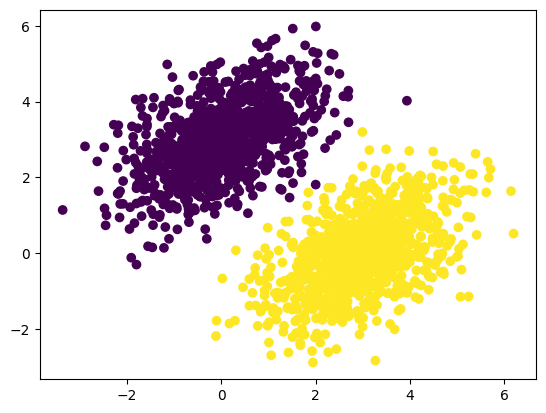

In [8]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [9]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [10]:
def model(inputs):
  return tf.matmul(inputs, W) + b


In [11]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)


In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [13]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss as step {step}: {loss:.4f}")

Loss as step 0: 2.2132
Loss as step 1: 0.3266
Loss as step 2: 0.1430
Loss as step 3: 0.1140
Loss as step 4: 0.1040
Loss as step 5: 0.0968
Loss as step 6: 0.0904
Loss as step 7: 0.0847
Loss as step 8: 0.0794
Loss as step 9: 0.0746
Loss as step 10: 0.0703
Loss as step 11: 0.0663
Loss as step 12: 0.0626
Loss as step 13: 0.0593
Loss as step 14: 0.0563
Loss as step 15: 0.0535
Loss as step 16: 0.0510
Loss as step 17: 0.0487
Loss as step 18: 0.0466
Loss as step 19: 0.0447
Loss as step 20: 0.0429
Loss as step 21: 0.0413
Loss as step 22: 0.0398
Loss as step 23: 0.0385
Loss as step 24: 0.0373
Loss as step 25: 0.0362
Loss as step 26: 0.0352
Loss as step 27: 0.0343
Loss as step 28: 0.0334
Loss as step 29: 0.0326
Loss as step 30: 0.0319
Loss as step 31: 0.0313
Loss as step 32: 0.0307
Loss as step 33: 0.0302
Loss as step 34: 0.0297
Loss as step 35: 0.0292
Loss as step 36: 0.0288
Loss as step 37: 0.0285
Loss as step 38: 0.0281
Loss as step 39: 0.0278


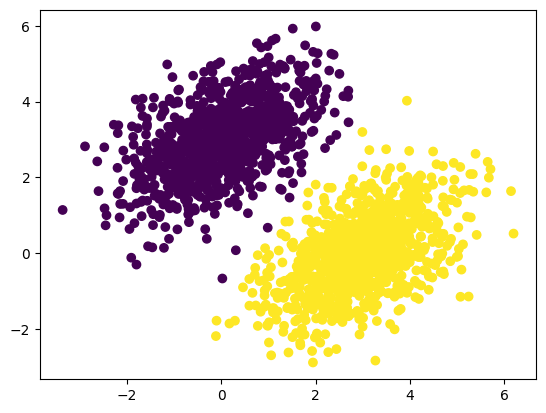

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

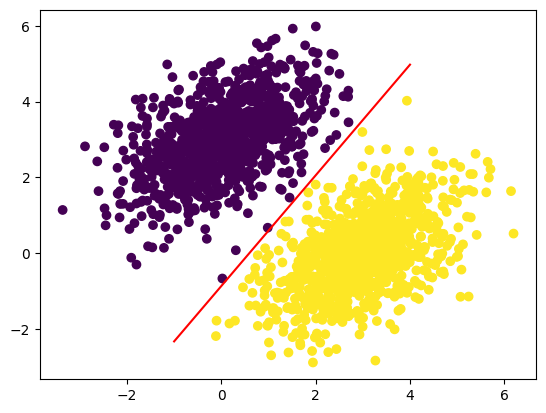

In [15]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)


In [16]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [17]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
output_tensor.shape


TensorShape([2, 32])

In [18]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [19]:
layer

<Dense name=dense, built=False>